# Indexing & SQLite Assignment 

### Importing Libraries

In [1]:
import pandas as pd
import sqlite3

### Create DataBase

In [2]:
db = sqlite3.connect('IMDB.sqlite')

### Question 1

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the most voted movie in IMDB Movie Database.

Print the movie name and the rating of that movie.

Output Format:

movie_name rating

In [3]:
query = 'select Title, Rating, max(TotalVotes) from IMDB;'
df = pd.read_sql_query(query, db)
print(df.values[0][0], df.values[0][1])

Inception (2010) 8.8


### Question 2

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the Movie with Longest-Running Time from IMDB Movie database.

Print the name of movie and running time as integer value.

Note: Don't print 'min' in running time.
    
Output Format:
    
movie_name running_time

In [4]:
query = 'select * from IMDB;'
df = pd.read_sql_query(query, db)
def fixTime(time) :
    if time == '':
        return 0
    else :
        return int(time.split()[0])
df['Time'] = df.Runtime.apply(fixTime)
df.to_sql('IMDB', db, if_exists = 'replace')

query = 'select Title, max(Time) from IMDB;'
df = pd.read_sql_query(query, db)
print(df.values[0][0], df.values[0][1])

The Wolf of Wall Street (2013) 180


### Question 3

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has maximum net profit in IMDB Movie Database.

Print the movie name.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

Output Format:

movie_name

In [5]:
## creating total
query = 'select * from earning;'
df = pd.read_sql_query(query, db)
df['Total'] = df.Domestic + df.Worldwide
df.to_sql('earning', db, if_exists = 'replace')

117

In [6]:
query = 'select IMDB.Title, max(earning.Total) from IMDB inner join earning on IMDB.Movie_id = earning.Movie_id;'
df = pd.read_sql_query(query, db)
df

,Title,max(earning.Total)
0,Star Wars: The Force Awakens (2015),3.004886e+09


In [7]:
print(df.values[0][0])

Star Wars: The Force Awakens (2015)


### Question 4

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the least budgeted movie in IMDB Movie Database.

If there is more than one least budgeted movies then print the movie which has maximum net profit.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget
    
Output Format:
    
movie_name

In [8]:
query = 'select * from IMDB;'
df = pd.read_sql_query(query, db)
def fixBudget(budgetInString) :
    if (budgetInString == '') :
        return 0
    else :
        return int(float(budgetInString))
df['BudgetInteger'] = df.Budget.apply(fixBudget)
df.to_sql('IMDB', db, if_exists = 'replace')
df

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Time,BudgetInteger
0,0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,134,20000000
1,1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,94,18000000
2,2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,...,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6,100,8000000
3,3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,...,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,123,12000000
4,4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,...,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8,127,8900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,...,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4,107,3300000
113,113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,...,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6,0,165000000
114,114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,...,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9,132,200000000
115,115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,...,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7,132,160000000


In [9]:
## now get min budget sort by total col in join table
query = 'select min(BudgetInteger) from IMDB where BudgetInteger != 0;'
df = pd.read_sql_query(query, db)
df

,min(BudgetInteger)
0,1000000


In [10]:
minBudget = df.values[0][0]
query = 'select IMDB.Title, min(IMDB.BudgetInteger), earning.Total from IMDB inner join earning on IMDB.Movie_id = earning.Movie_id where IMDB.BudgetInteger != 0 and IMDB.BudgetInteger = 1000000 order by earning.Total;'
df = pd.read_sql_query(query, db)
df

,Title,min(IMDB.BudgetInteger),Total
0,Short Term 12 (2013),1000000,2026200.0


In [11]:
print(df.values[0][0])

Short Term 12 (2013)


### Question 5 (Wrong Output)

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.

Print the Year and name of the movie which was the highest grosser in that year.

Note:Print the year in ascending order.
    
Output Format:
    
year_1 name_movie_1

year_2 name_movie_2

year_3 name_movie_3

In [17]:
query = 'select * from IMDB;'
df = pd.read_sql_query(query, db)
df
def extractYear(title) :
    title = title.split()
    year = title[-1]
    year = year.replace('(', '')
    year = year.replace(')', '')
    year = int(year)
    return year
df['Year'] = df.Title.apply(extractYear)
del df['level_0']
df

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Time,BudgetInteger,Year
0,0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,7.8,7.8,8.1,8.0,7.7,8.3,8.0,134,20000000,2013
1,1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.3,7.3,7.5,7.6,7.0,7.7,7.6,94,18000000,2010
2,2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,...,7.4,7.4,7.5,7.4,7.0,7.9,7.6,100,8000000,2011
3,3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,...,7.6,7.5,7.8,7.7,6.9,7.8,7.7,123,12000000,2013
4,4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,...,7.9,7.8,8.1,6.6,7.2,7.9,7.8,127,8900000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,...,8.1,8.1,8.2,8.7,8.0,8.6,8.4,107,3300000,2014
113,113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,...,7.4,7.4,7.5,7.4,7.2,7.9,7.6,0,165000000,2012
114,114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,...,7.7,7.7,7.9,7.5,7.4,8.1,7.9,132,200000000,2014
115,115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,...,7.6,7.5,7.7,7.6,7.3,7.8,7.7,132,160000000,2011


In [18]:
df.to_sql('IMDB', db, if_exists = 'replace')
df

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Time,BudgetInteger,Year
0,0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,7.8,7.8,8.1,8.0,7.7,8.3,8.0,134,20000000,2013
1,1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.3,7.3,7.5,7.6,7.0,7.7,7.6,94,18000000,2010
2,2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,...,7.4,7.4,7.5,7.4,7.0,7.9,7.6,100,8000000,2011
3,3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,...,7.6,7.5,7.8,7.7,6.9,7.8,7.7,123,12000000,2013
4,4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,...,7.9,7.8,8.1,6.6,7.2,7.9,7.8,127,8900000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,...,8.1,8.1,8.2,8.7,8.0,8.6,8.4,107,3300000,2014
113,113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,...,7.4,7.4,7.5,7.4,7.2,7.9,7.6,0,165000000,2012
114,114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,...,7.7,7.7,7.9,7.5,7.4,8.1,7.9,132,200000000,2014
115,115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,...,7.6,7.5,7.7,7.6,7.3,7.8,7.7,132,160000000,2011


In [40]:
def extractName(title) :
    title = title.split()
    l = len(title)
    name = ''
    for i in range(l - 1) :
        name += title[i]
    return name
query = 'select * from IMDB;'
df = pd.read_sql_query(query, db)
del df['level_0']
df['MovieName'] = df.Title.apply(extractName)
df

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Time,BudgetInteger,Year,MovieName
0,0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,7.8,8.1,8.0,7.7,8.3,8.0,134,20000000,2013,12YearsaSlave
1,1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.3,7.5,7.6,7.0,7.7,7.6,94,18000000,2010,127Hours
2,2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,...,7.4,7.5,7.4,7.0,7.9,7.6,100,8000000,2011,50/50
3,3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,...,7.5,7.8,7.7,6.9,7.8,7.7,123,12000000,2013,AboutTime
4,4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,...,7.8,8.1,6.6,7.2,7.9,7.8,127,8900000,2012,Amour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,...,8.1,8.2,8.7,8.0,8.6,8.4,107,3300000,2014,Whiplash
113,113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,...,7.4,7.5,7.4,7.2,7.9,7.6,0,165000000,2012,Wreck-ItRalph
114,114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,...,7.7,7.9,7.5,7.4,8.1,7.9,132,200000000,2014,X-Men:DaysofFuturePast
115,115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,...,7.5,7.7,7.6,7.3,7.8,7.7,132,160000000,2011,X-Men:FirstClass


In [42]:
df.to_sql('IMDB', db, if_exists = 'replace')
df

,index,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,...,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,Time,BudgetInteger,Year,MovieName
0,0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,...,7.8,8.1,8.0,7.7,8.3,8.0,134,20000000,2013,12YearsaSlave
1,1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,...,7.3,7.5,7.6,7.0,7.7,7.6,94,18000000,2010,127Hours
2,2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,...,7.4,7.5,7.4,7.0,7.9,7.6,100,8000000,2011,50/50
3,3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,...,7.5,7.8,7.7,6.9,7.8,7.7,123,12000000,2013,AboutTime
4,4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,...,7.8,8.1,6.6,7.2,7.9,7.8,127,8900000,2012,Amour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,...,8.1,8.2,8.7,8.0,8.6,8.4,107,3300000,2014,Whiplash
113,113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,...,7.4,7.5,7.4,7.2,7.9,7.6,0,165000000,2012,Wreck-ItRalph
114,114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,...,7.7,7.9,7.5,7.4,8.1,7.9,132,200000000,2014,X-Men:DaysofFuturePast
115,115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,...,7.5,7.7,7.6,7.3,7.8,7.7,132,160000000,2011,X-Men:FirstClass


In [55]:
query = 'select IMDB.Year, earning.Total from IMDB inner join earning group by IMDB.Year;'
df = pd.read_sql_query(query, db)
df

,Year,Total
0,2010,244405195.0
1,2011,244405195.0
2,2012,244405195.0
3,2013,244405195.0
4,2014,244405195.0
5,2015,244405195.0
6,2016,244405195.0


In [44]:
for i in df.values :    
    print(i[0], i[1])

2010 127Hours
2011 50/50
2012 Amour
2013 12YearsaSlave
2014 BigHero6
2015 BridgeofSpies
2016 Arrival


### Question 6

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..

Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.
    
Output Format:
    
genre_1 percent_1

genre_2 percent_2

In [67]:
import matplotlib.pyplot as plt
import numpy as np

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


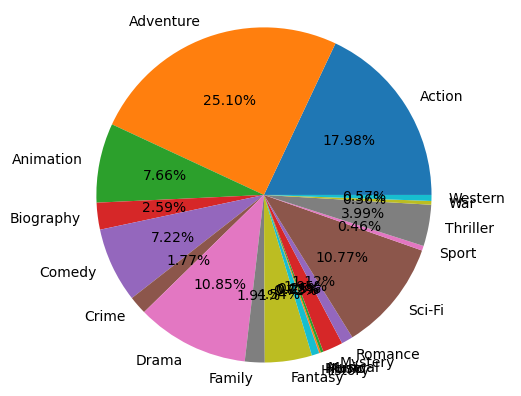

In [70]:
query = 'select * from IMDB;'
df = pd.read_sql_query(query, db)

query = 'select genre.genre, sum(IMDB.budgetInteger) from IMDB inner join genre on IMDB.Movie_id = genre.Movie_id group by genre.genre;'
df = pd.read_sql_query(query, db)
df = df[df.genre != '']
df.reset_index(drop = True, inplace = True)

names = list(df.genre)
amount = list(df['sum(IMDB.budgetInteger)'])

plt.pie(amount, labels = names, autopct = '%.2f%%', counterclock = True)
plt.axis('equal')

total = sum(amount)

amount = np.array(amount)

amount = (amount / total) * 100;

for i in range(len(names)) :
    rounded_number = format(amount[i], ".2f") 
    print(names[i], rounded_number)

plt.show()

### Question 7

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

Output Format:

genre_1 percent_1

genre_2 percent_2

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


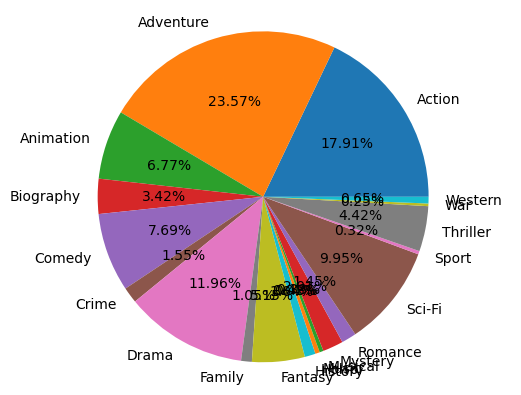

In [72]:
query = 'select * from earning;'
df = pd.read_sql_query(query, db)

query = 'select genre.genre, sum(earning.Total) from earning inner join genre on earning.Movie_id = genre.Movie_id group by genre.genre;'
df = pd.read_sql_query(query, db)
df = df[df.genre != '']
df.reset_index(drop = True, inplace = True)

names = list(df.genre)
amount = list(df['sum(earning.Total)'])

plt.pie(amount, labels = names, autopct = '%.2f%%', counterclock = True)
plt.axis('equal')

total = sum(amount)

amount = np.array(amount)

amount = (amount / total) * 100;

for i in range(len(names)) :
    rounded_number = format(amount[i], ".2f") 
    print(names[i], rounded_number)

plt.show()

### Question 8

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.

Print the movie name.

Movies has multiple genre.

Output Format:

movie_name

In [75]:
query = 'select IMDB.Title, genre.genre, IMDB.Rating from IMDB inner join genre on IMDB.Movie_id = genre.Movie_id where genre.genre in ("Sci-Fi", "Mystery") and IMDB.Rating >= 8;'
df = pd.read_sql_query(query, db)
df

,Title,genre,Rating
0,Arrival (2016),Mystery,8.0
1,Arrival (2016),Sci-Fi,8.0
2,Gone Girl (2014),Mystery,8.1
3,Guardians of the Galaxy (2014),Sci-Fi,8.1
4,Her (2013),Sci-Fi,8.0
5,Inception (2010),Sci-Fi,8.8
6,Interstellar (2014),Sci-Fi,8.6
7,Mad Max: Fury Road (2015),Sci-Fi,8.1
8,Prisoners (2013),Mystery,8.1
9,Shutter Island (2010),Mystery,8.1


In [76]:
name = df.values[0][0]
print(name)

Arrival (2016)


### Closing DataBase

In [79]:
db.close()